## Parsing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rosseti_parser import RossetiParser

Parse Rosseti site or load data from csv

In [2]:
import os

file_path = './data.csv'

if os.path.isfile(file_path):
    parser = RossetiParser(file_path=file_path)
else:
    parser = RossetiParser()
    parser.save_df(file_path)

Read from "./data.csv"


In [3]:
print(parser)

From 2023-09-21 for 7 days with 251 records


In [4]:
df = parser.df

Parse street dataframe column and split row by it

In [5]:
from rosseti_parser import split_addresses

df = split_addresses(df)

df

index Регион РФ (область, край, город фед. значения, округ)  \
0         0                              Ленинградская область      
1         1                                    Санкт-Петербург      
2         1                                    Санкт-Петербург      
3         1                                    Санкт-Петербург      
4         1                                    Санкт-Петербург      
...     ...                                                ...      
1835    250                              Ленинградская область      
1836    250                              Ленинградская область      
1837    250                              Ленинградская область      
1838    250                              Ленинградская область      
1839    250                              Ленинградская область      

     Административный район  \
0          Тосненский район   
1         Фрунзенский район   
2         Фрунзенский район   
3         Фрунзенский район   
4         Фрунзенский район   
...                     ...   
1835       Гатчинский район   
1836       Гатчинский район   
1837       Гатчинский район   
1838       Гатчинский район   
1839       Гатчинский район   

                                       Населённый пункт  \
0                                             п. Рябово   
1                                    г. Санкт-Петербург   
2                                    г. Санкт-Петербург   
3                                    г. Санкт-Петербург   
4                                    г. Санкт-Петербург   
...                                                 ...   
1835  Антропшино, г. Коммунар, д. Покровское, Пудомя...   
1836  Антропшино, г. Коммунар, д. Покровское, Пудомя...   
1837  Антропшино, г. Коммунар, д. Покровское, Пудомя...   
1838  Антропшино, г. Коммунар, д. Покровское, Пудомя...   
1839  Антропшино, г. Коммунар, д. Покровское, Пудомя...   

                                             Улица  \
0                              Мысленская,Заречная   
1                             ул. Димитрова  д. 12   
2                               ул. Димитрова  к.1   
3                             ул. Димитрова  лит.А   
4                                       д. 16  к.1   
...                                            ...   
1835              Гамболовский проезд Парковая д.3   
1836  Гамболовский проезд Садоводство Славяночка-2   
1837              Гамболовский проезд Славяночка-3   
1838        Гамболовский проезд КП Павловские Дачи   
1839                          Гамболовский проезд    

     Плановая дата начала отключения электроснабжения  \
0                                          28-09-2023   
1                                          28-09-2023   
2                                          28-09-2023   
3                                          28-09-2023   
4                                          28-09-2023   
...                                               ...   
1835                                       21-09-2023   
1836                                       21-09-2023   
1837                                       21-09-2023   
1838                                       21-09-2023   
1839                                       21-09-2023   

     Плановое время начала отключения электроснабжения  \
0                                                17:00   
1                                                11:00   
2                                                11:00   
3                                                11:00   
4                                                11:00   
...                                                ...   
1835                                             00:00   
1836                                             00:00   
1837                                             00:00   
1838                                             00:00   
1839                                             00:00   

     Плановая дата восстановления отключения электроснабжения  \

Fetch `Building_ID` and coordinates from Geocoder API

In [6]:
from rosseti_parser import fetch_builing_ids

file_path = 'data_with_building_id.csv'

if os.path.isfile(file_path):
    df = pd.read_csv(file_path)
else:
    df = fetch_builing_ids(df)
    df.to_csv('./data_with_building_id.csv', index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 15 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   index                                                      1840 non-null   int64  
 1   Регион РФ (область, край, город фед. значения, округ)      1840 non-null   object 
 2   Административный район                                     1840 non-null   object 
 3   Населённый пункт                                           1840 non-null   object 
 4   Улица                                                      1741 non-null   object 
 5   Плановая дата начала отключения электроснабжения           1840 non-null   object 
 6   Плановое время начала отключения электроснабжения          1840 non-null   object 
 7   Плановая дата восстановления отключения электроснабжения   1840 non-null   object 
 8   Плановое

Run dataframe preprocessing

In [8]:
from rosseti_parser import preprocess_df, COL_NS, ICOL_NS, preprocess_read_df

file_path = 'data_preprocessed.csv'

if os.path.isfile(file_path):
    df = pd.read_csv(file_path)
    df = preprocess_read_df(df)
else:
    df = preprocess_df(df)
    df.to_csv('./data_preprocessed.csv', index=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        1840 non-null   int64         
 1   region       1840 non-null   object        
 2   area         1840 non-null   object        
 3   town         1840 non-null   object        
 4   street       1741 non-null   object        
 5   branch       1839 non-null   object        
 6   res          1839 non-null   object        
 7   comment      675 non-null    object        
 8   building_id  576 non-null    float64       
 9   lat          576 non-null    float64       
 10  lng          576 non-null    float64       
 11  start        1840 non-null   datetime64[ns]
 12  finish       1840 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 187.0+ KB


Group dataframe rows by Rosseti table indexes 

In [10]:
from rosseti_parser import group_by_index

igr_df = group_by_index(df)

In [11]:
igr_df.head()

region                    area                town  \
index                                                                      
0      Ленинградская область        Тосненский район           п. Рябово   
1            Санкт-Петербург       Фрунзенский район  г. Санкт-Петербург   
2            Санкт-Петербург  Приморский район (СПб)     Санкт-Петербург   
3            Санкт-Петербург  Выборгский район (СПб)     Санкт-Петербург   
4            Санкт-Петербург  Приморский район (СПб)     Санкт-Петербург   

                                                  street          branch  \
index                                                                      
0                                  [Мысленская,Заречная]   Гатчинские ЭС   
1      [ул. Димитрова  д. 12, ул. Димитрова  к.1, ул....  Кабельная сеть   
2      [пр. Комендантский д. 7 к. 1 лит. А , пр. Коме...  Кабельная сеть   
3                            [ул. Композиторов д.10 д.6]  Кабельная сеть   
4      [ул. Маршала Новикова д. 6 к. 1 лит. А , ул. М...  Кабельная сеть   

                  res                                            comment  \
index                                                                      
0      Тосненский РЭС  В связи с производством оперативных переключен...   
1         Невский РЭС                                                NaN   
2        Западный РЭС                                                NaN   
3        Северный РЭС                                                NaN   
4        Западный РЭС                                                NaN   

                                             building_id  \
index                                                      
0                                                    NaN   
1           [46292.0, nan, nan, nan, nan, nan, nan, nan]   
2                              [112146.0, 126063.0, nan]   
3                                              [56457.0]   
4      [4020.0, 25834.0, 85754.0, 63976.0, 46929.0, 4...   

                                                     lat  \
index                                                      
0                                                    NaN   
1      [59.847309449, nan, nan, nan, nan, nan, nan, nan]   
2                      [60.005013183, 60.004879653, nan]   
3                                         [60.049447721]   
4      [60.010836015, 60.009947245, 60.010262878, 60....   

                                                     lng               start  \
index                                                                          
0                                                    NaN 2023-09-28 17:00:00   
1      [30.380589538, nan, nan, nan, nan, nan, nan, nan] 2023-09-28 11:00:00   
2                      [30.266799897, 30.264780597, nan] 2023-09-28 10:00:00   
3                                         [30.314760352] 2023-09-28 10:00:00   
4      [30.265892945, 30.265490881, 30.266135371, 30.... 2023-09-28 10:00:00   

                   finish  
index                      
0     2023-09-28 18:00:00  
1     2023-09-28 17:00:00  
2     2023-09-28 17:00:00  
3     2023-09-28 17:00:00  
4     2023-09-28 17:00:00

In [12]:
igr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 250
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   region       251 non-null    object        
 1   area         251 non-null    object        
 2   town         251 non-null    object        
 3   street       152 non-null    object        
 4   branch       250 non-null    object        
 5   res          250 non-null    object        
 6   comment      81 non-null     object        
 7   building_id  69 non-null     object        
 8   lat          69 non-null     object        
 9   lng          69 non-null     object        
 10  start        251 non-null    datetime64[ns]
 11  finish       251 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(10)
memory usage: 25.5+ KB


## Analysis

### Building fetching visualisation 

In [13]:
def print_percent(n):
    print(np.round(n * 100))

Percent of rows with street specified

In [14]:
igr_not_nan_street_df = igr_df[~pd.isnull(igr_df['street'])].copy()

not_nan_street = len(igr_not_nan_street_df)/len(igr_df)

print_percent(not_nan_street)

61.0


Percent of rows with at least one building found

In [15]:
@np.vectorize
def has_fetched_building_id(cell):
    return len(np.array(cell)[~pd.isnull(np.array(cell))]) > 0


not_nan_building_rows = len(igr_not_nan_street_df[
    has_fetched_building_id(igr_not_nan_street_df['building_id'])
]) / len(igr_not_nan_street_df)

print_percent(not_nan_building_rows)


45.0


Percent of street entities with found buildings

In [16]:
def count_found_building_percent(row: pd.Series):
    streets = np.array(row['street'])
    buildings = np.array(row['building_id'])

    buildings = buildings[~pd.isnull(buildings)]

    return len(buildings) / len(streets)


found_buildings_per_row = igr_not_nan_street_df[['street', 'building_id']].apply(
    count_found_building_percent, axis=1)

found_buildings = found_buildings_per_row.mean()
found_buildings_not_nan_street = found_buildings_per_row[found_buildings_per_row != 0].mean()

print_percent(found_buildings)

print_percent(found_buildings_not_nan_street)

32.0
71.0


<Axes: >

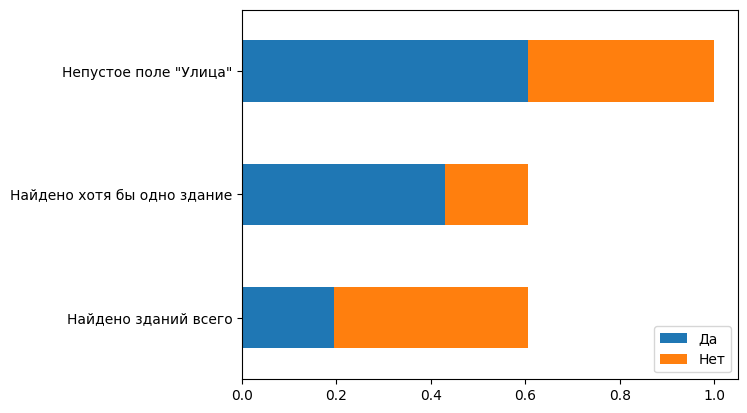

In [17]:
def full_pair(n):
    return np.array([n, 1 - n])


percents_df = pd.DataFrame({
    'Найдено зданий всего': full_pair(found_buildings) * not_nan_street,
    'Найдено хотя бы одно здание': full_pair(found_buildings_not_nan_street) * not_nan_street,
    'Непустое поле "Улица"': full_pair(not_nan_street),
}, index=['Да', 'Нет']).T

percents_df.plot(kind='barh', stacked=True)


In [18]:
igr_not_nan_street_df['found_building_percent'] = found_buildings_per_row

fb_area = igr_not_nan_street_df.groupby('area')['found_building_percent'].sum().sort_values(ascending=False)
fb_region = igr_not_nan_street_df.groupby('region')['found_building_percent'].sum().sort_values(ascending=False)
fb_town = igr_not_nan_street_df.groupby('town')['found_building_percent'].sum().sort_values(ascending=False)
fb_res = igr_not_nan_street_df.groupby('res')['found_building_percent'].sum().sort_values(ascending=False)

fb_town.loc['г. Санкт-Петербург'] += fb_town['Санкт-Петербург']
fb_town.drop('Санкт-Петербург', inplace=True)

fb_area = fb_area[~(fb_area == 0)]
fb_town = fb_town[~(fb_town == 0)]
fb_res = fb_res[~(fb_res == 0)]

for series in (fb_area, fb_region, fb_town, fb_res):
    display(series.head())

area
Приморский район (СПб)     9.681592
Курортный район            6.953731
Красногвардейский район    6.571429
Фрунзенский район          6.304798
Пушкинский район           5.096774
Name: found_building_percent, dtype: float64

region
Санкт-Петербург          47.958324
Ленинградская область     0.893617
Name: found_building_percent, dtype: float64

town
г. Санкт-Петербург    34.892893
г. Пушкин              3.000000
г.Зеленогорск          3.000000
п.Лисий Нос            1.253731
п.Молодежное           1.100000
Name: found_building_percent, dtype: float64

res
Западный РЭС      8.666667
Курортный РЭС     6.953731
Пушкинский РЭС    5.990391
Южный РЭС         5.333333
Восточный РЭС     4.571429
Name: found_building_percent, dtype: float64

In [19]:
def plot_found_building_percent(df, name):
    fb_area_df = pd.DataFrame(df).rename(columns={
        'found_building_percent': 'Найдено зданий в ' + name
    })

    ax = fb_area_df.T.plot(kind='barh', stacked=True)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xticks([])

    return ax

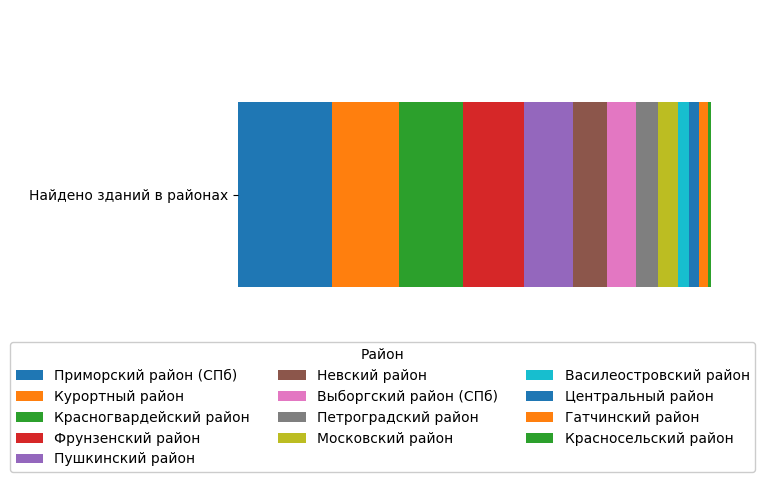

In [20]:
fb_area_ax = plot_found_building_percent(fb_area, 'районах')
fb_area_ax.legend(ncol=3, loc=(-0.46, -0.25), framealpha=1, title='Район')

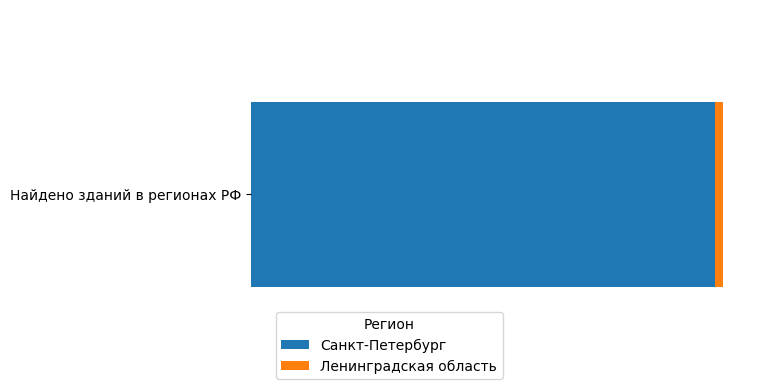

In [21]:
fb_region_ax = plot_found_building_percent(fb_region, 'регионах РФ')
fb_region_ax.legend(loc=(0.05, 0), title='Регион')

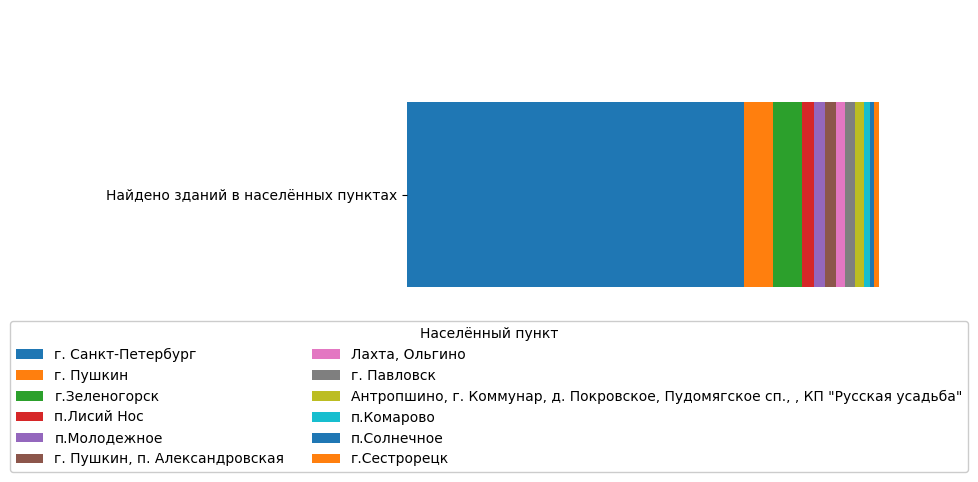

In [22]:
fb_town_ax = plot_found_building_percent(fb_town, 'населённых пунктах')
fb_town_ax.legend(ncol=2, loc=(-0.8, -0.25), framealpha=1, title='Населённый пункт')

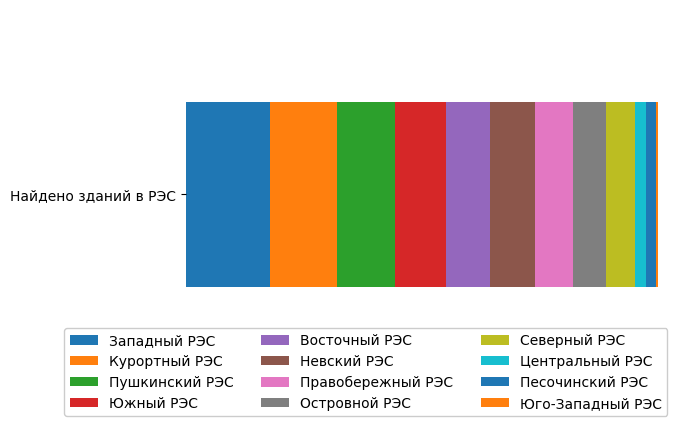

In [23]:
fb_res_ax = plot_found_building_percent(fb_res, 'РЭС')
fb_res_ax.legend(ncol=3, loc=(-0.245, -0.1), framealpha=1)

### Outage statistics

In [24]:
has_geo_df = df[pd.notnull(df['building_id'])].reset_index(drop=True)

has_geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        576 non-null    int64         
 1   region       576 non-null    object        
 2   area         576 non-null    object        
 3   town         576 non-null    object        
 4   street       576 non-null    object        
 5   branch       576 non-null    object        
 6   res          576 non-null    object        
 7   comment      274 non-null    object        
 8   building_id  576 non-null    float64       
 9   lat          576 non-null    float64       
 10  lng          576 non-null    float64       
 11  start        576 non-null    datetime64[ns]
 12  finish       576 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 58.6+ KB


Distribution of outage by observation day

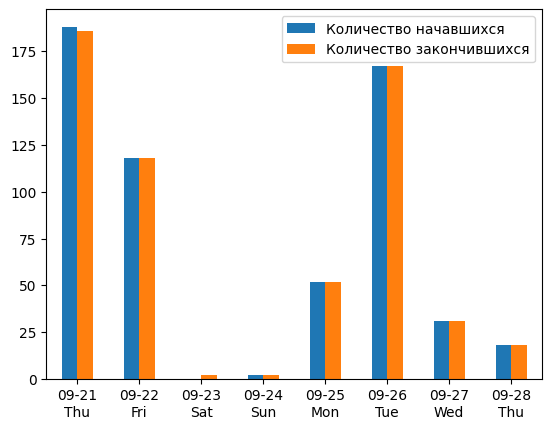

In [25]:
dates_df = pd.DataFrame(index=pd.to_datetime(np.unique(np.concatenate([has_geo_df[a].dt.date.unique() for a in ('start', 'finish')]))))

start_day_count = has_geo_df.groupby(has_geo_df['start'].dt.day).size()
finish_day_count = has_geo_df.groupby(has_geo_df['finish'].dt.day).size()

dates_df = dates_df.join(pd.Series(start_day_count, name='Количество начавшихся'), on=dates_df.index.day)

dates_df = dates_df.join(pd.Series(finish_day_count, name='Количество закончившихся'), on=dates_df.index.day)

ax = plt.subplot()

dates_df.plot(kind='bar', ax=ax)

ax.set_xticklabels(dates_df.index.strftime("%m-%d\n%a"))
ax.get_xaxis().set_tick_params(labelrotation=0)

Distribution of outage time by hour

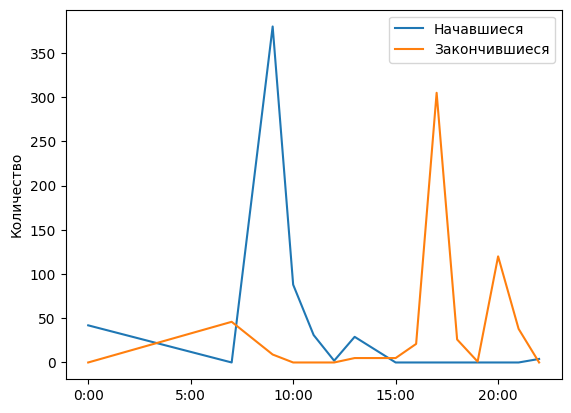

In [26]:
start_n = has_geo_df.groupby(has_geo_df['start'].dt.hour).size().rename('Начавшиеся')
finish_n = has_geo_df.groupby(has_geo_df['finish'].dt.hour).size().rename('Закончившиеся')

hrs_df = pd.concat([start_n, finish_n], axis=1, sort=True)

hrs_df.fillna(0, inplace=True)

hrs_df.plot()

xlim = plt.xlim()

plt.ylabel('Количество')
plt.gca().get_xaxis().set_major_formatter('{x:.0f}:00')

Number of outages in time

Text(0, 0.5, 'Количество')

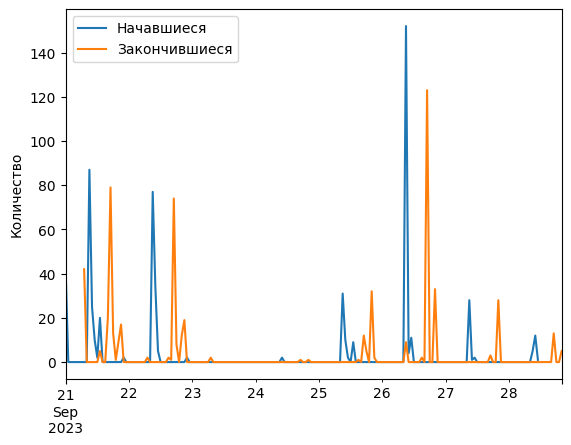

In [27]:
start_series = has_geo_df.resample('1H', on='start').size()
finish_series = has_geo_df.resample('1H', on='finish').size()

start_series.plot(label='Начавшиеся')
finish_series.plot(label='Закончившиеся')

plt.legend()
plt.xlabel('')
plt.ylabel('Количество')

Frequency representation

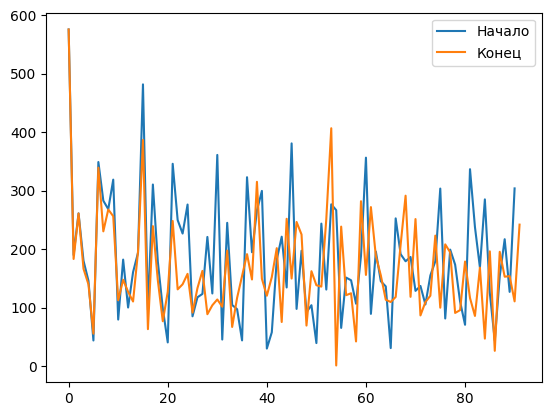

In [28]:
for series in (start_series, finish_series):
    plt.plot(abs(np.fft.rfft(series)))

plt.legend(('Начало', 'Конец'))

Number of simultanious outages

Text(0, 0.5, 'Количество одновременно отключённых')

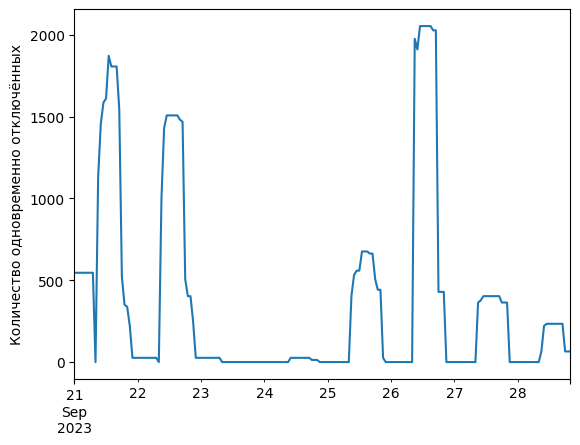

In [29]:
@np.vectorize
def count_inclusions(now):
    return has_geo_df[(has_geo_df['start'] <= now) & (now <= has_geo_df['finish'])].size


hours = pd.date_range(has_geo_df['start'].min(), has_geo_df['finish'].max(), freq='1H')

outages = count_inclusions(hours)

pd.DataFrame(outages, index=hours).plot()

plt.legend().set_visible(False)
plt.ylabel('Количество одновременно отключённых')

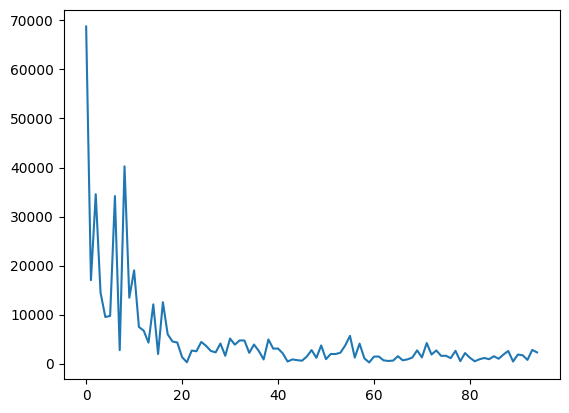

In [30]:
plt.plot(abs(np.fft.rfft(outages)))

Outages, that will last for more than a day

In [31]:
has_geo_df[has_geo_df['finish'] - has_geo_df['start'] > pd.Timedelta("1d")]

Empty DataFrame
Columns: [index, region, area, town, street, branch, res, comment, building_id, lat, lng, start, finish]
Index: []

Outages lengths distribution

Text(0, 0.5, 'Частота')

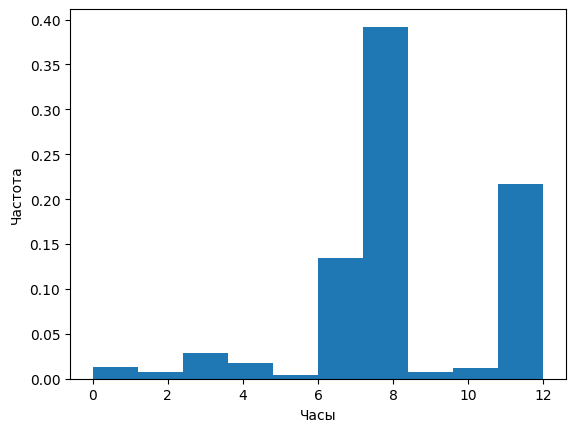

In [32]:
durations = (has_geo_df['finish'] - has_geo_df['start']) / pd.Timedelta('1H')

durations.plot(kind='hist', density=True)
plt.xlabel("Часы")
plt.ylabel("Частота")

Number of buildings where outages occur more than once

<Axes: >

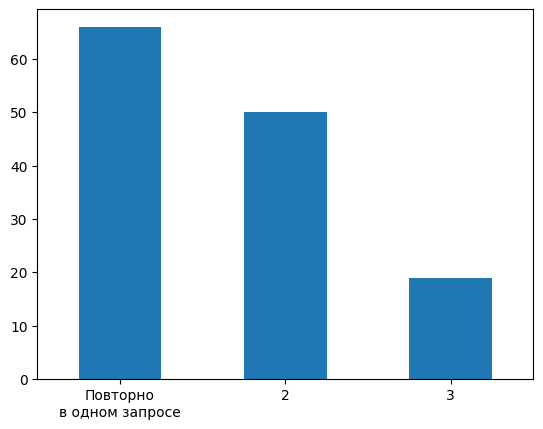

In [33]:
repeating_buildings = has_geo_df[has_geo_df.duplicated('building_id', keep=False)].drop_duplicates(['index', 'building_id']).groupby('building_id')

dups = repeating_buildings.size().value_counts()

dups.rename({1: 'Повторно\nв одном запросе'}, inplace=True)

dups.plot(kind='bar', rot=0)